In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

color_palette = sns.color_palette() 
plt.style.use('ggplot') 
pd.set_option('display.max_columns', 200) 
pd.set_option('display.max_rows', 100)  

# Understanding the Data
* shape
* head and tail
* dtypes
* describe
* missing values

In [17]:
df_raw = pd.read_csv('../input/PJME_hourly.csv')

In [18]:
df = df_raw.copy()
df.columns

Index(['Datetime', 'PJME_MW'], dtype='object')

In [19]:
df = df_raw.copy()
df = df.set_index('Datetime')

df.index = pd.to_datetime(df.index)
df = df.sort_index()



<Axes: title={'center': 'Hourly Energy Consumption'}, xlabel='Datetime'>

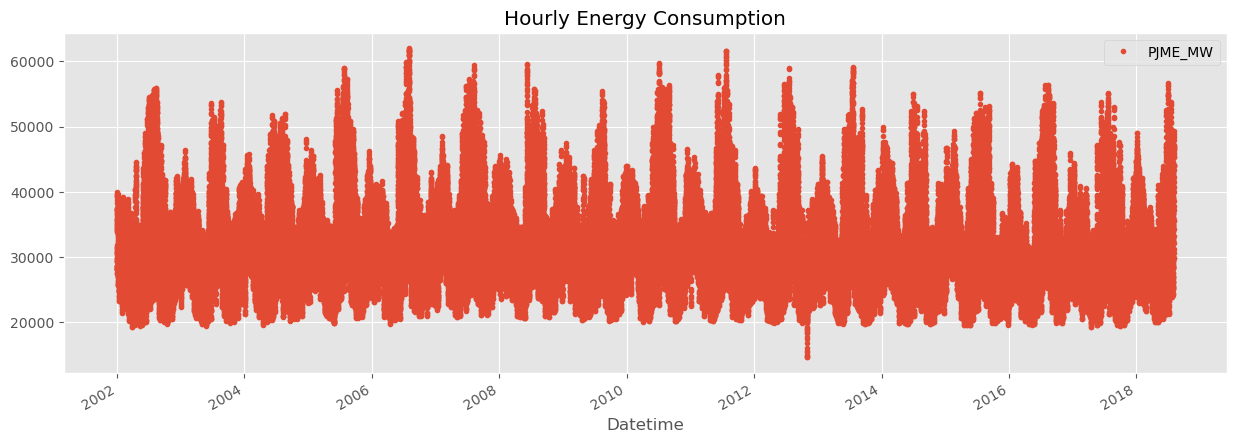

In [20]:
df.plot(figsize=(15, 5), style='.', color=color_palette[0], title='Hourly Energy Consumption')

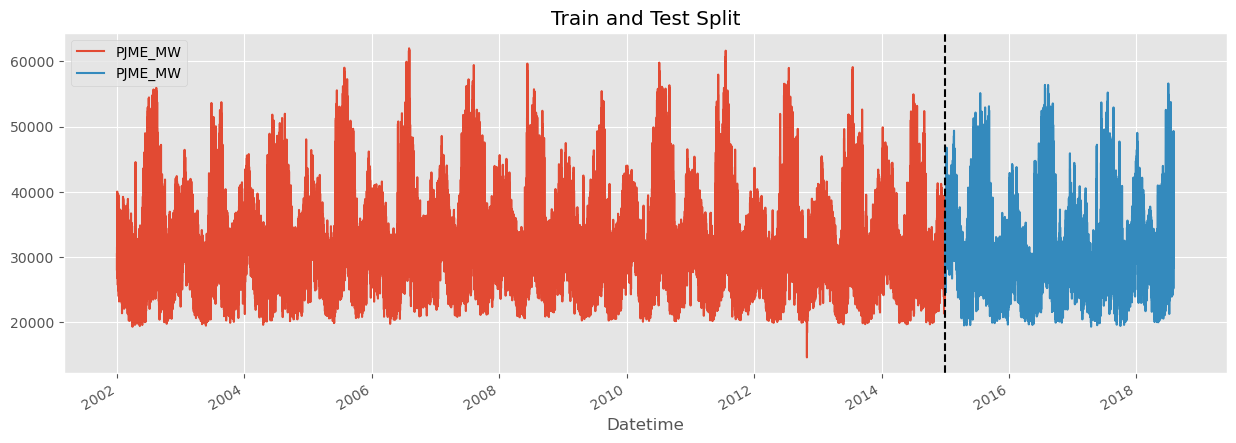

In [21]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Train Set')
test.plot(ax=ax, label='Test Set', title='Train and Test Split')
ax.axvline(pd.to_datetime('01-01-2015'), color='black', linestyle='--', label='Split Point')
plt.show()

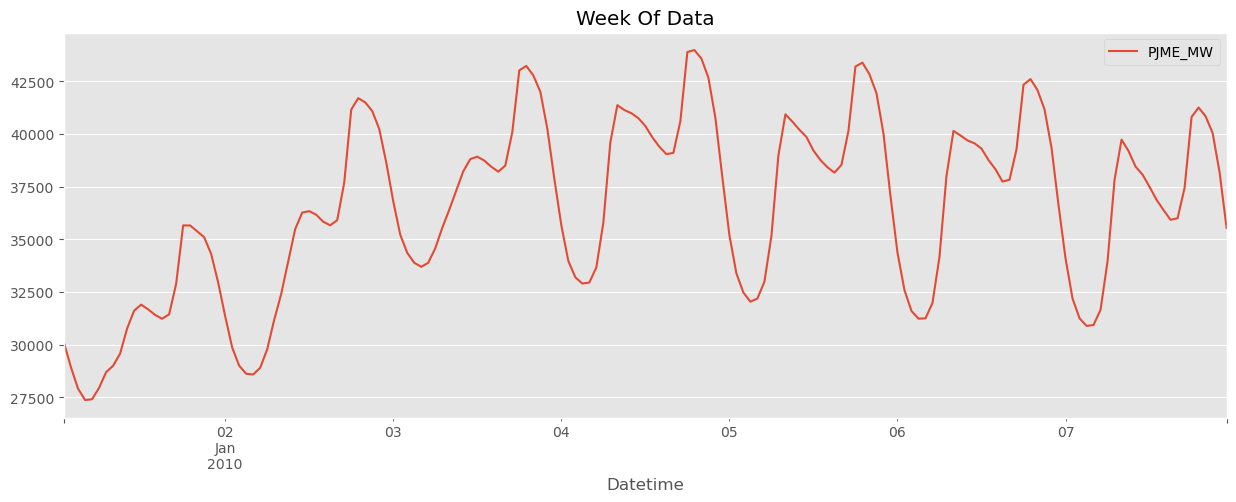

In [22]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

# FEATURE CREATION


In [23]:
def create_features(df):
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [24]:
df = create_features(df)
df.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'dayofyear', 'month', 'year',
       'weekofyear'],
      dtype='object')

C:\Users\benla\AppData\Local\Temp\ipykernel_30496\3612191497.py:2: UserWarning: 
The palette list has fewer values (7) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='hour', y='PJME_MW', hue='hour', palette=color_palette[:24]) # put the gradient of choice, but still have to fit number of hours


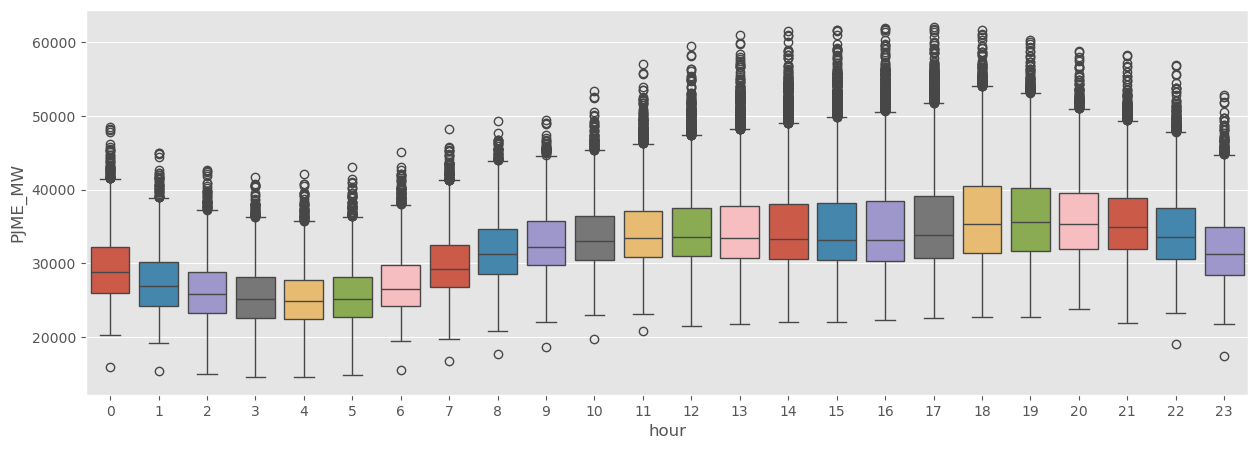

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x='hour', y='PJME_MW', hue='hour', palette=color_palette[:24]) # put the gradient of choice, but still have to fit number of hours
ax.legend_.remove() # remove ledgend since it is just in the way
plt.show()

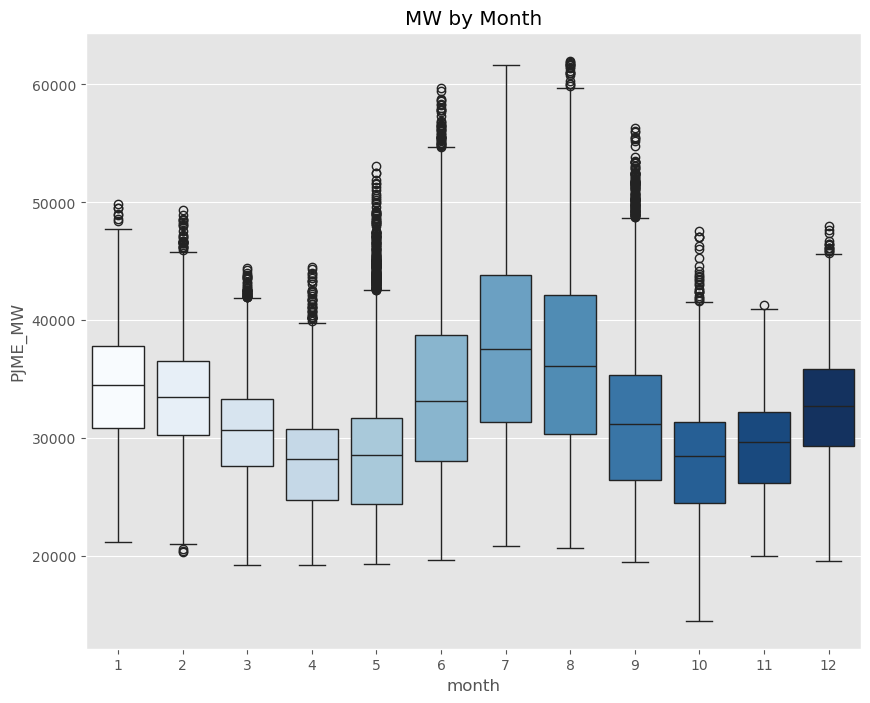

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(
    data=df, 
    x='month', 
    y='PJME_MW', 
    hue='month',       # Explicitly use month for colors
    palette='Blues', 
    legend=False       # Remove redundant legend
)
ax.set_title('MW by Month')
plt.show()

In [27]:
# HOW TO MAKE THE PALLETTE WORK FOR ALL DIFFERNT COUNTS OF VALUESA



# Feature Understanding
* univariate analysis
* histograms
* kdes
* boxplots
* pivot tables

# Feature Relationships
* understanding how the features are related to each other
* scatterplots
* correlation and heatmaps
* Pairplots
* Group by comparisons

# Asking questions about the data
* trying to answer questions about the data using plots or statistics

# Feature engineering
* how to interpolate/remove missing values
* how to encode categoricals (when nessecary)
* which additional features should I add

# Model creation
* make simple models and test performance
* analyze what they get right and wrong
* decide if we should improve current model, try another model, or go back to feature engineering
* work until model performance is arbitrarily high enough

# Model Evaluation


# Final output on test set
* from all the models it seems that Neural Nets perform the best (albeit only slightly better than 
the other methods)
* output test set to output file